# Employee Absenteeism(Project 2)

### Import Required libraries

In [1]:
import numpy as np #For Mathematical calculations like Mean,std
import pandas as pd #For Dataframe operations
import matplotlib.pyplot as plt #Plotting graphs
import seaborn as sns #For plotting as matplotlib. But offers more colors & themes than matplotlib
from fancyimpute import KNN #Imputing Missing values using KNN method

%matplotlib inline #To show the plotted graph
sns.set() #To override the default styles of matplotlib

UsageError: unrecognized arguments: #To show the plotted graph


### Load data

In [2]:
df = pd.read_excel('Absenteeism_at_work_Project.xls')

In [3]:
#Copy the original df to another for safety
df_copy = df.copy()

In [4]:
#create a new dataframe and then later we append the columns without missing values and in proper format
new_df = pd.DataFrame()

In [5]:
#Checking the head of the data
df_copy.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
#Knowing much information about data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [7]:
#Checking the shape of the data to know No. of features & No. of observations
df_copy.shape

(740, 21)

In [8]:
#Summary Statistics of the data
df_copy.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
#Checking the no. of Unique values of each variable
df_copy.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [10]:
#From the above `df.nunique()`, we can categorise few of them as categorical based on no. of unique values
#Before that, we need to convert them to int from float
columns_to_be_categorised = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                             'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker',
                             'Pet']

In [11]:
#First, we check the unique values of the variables in the given data and then we convert few of them to categorical
for col in columns_to_be_categorised:
    print('Unique values of '+col+' are:',df[col].unique())

Unique values of Reason for absence are: [26.  0. 23.  7. 22. 19.  1. 11. 14. 21. 10. 13. 28. 18. 25. 24.  6. 27.
 17.  8. 12.  5.  9. 15.  4.  3. nan  2. 16.]
Unique values of Month of absence are: [ 7.  8.  9. 10. nan 11. 12.  1.  2.  3.  4.  5.  6.  0.]
Unique values of Day of the week are: [3 4 5 6 2]
Unique values of Seasons are: [1 4 2 3]
Unique values of Disciplinary failure are: [ 0.  1. nan]
Unique values of Education are: [ 1.  3.  2. nan  4.]
Unique values of Son are: [ 2.  1.  0.  4.  3. nan]
Unique values of Social drinker are: [ 1.  0. nan]
Unique values of Social smoker are: [ 0.  1. nan]
Unique values of Pet are: [ 1.  0.  4.  2.  5. nan  8.]


### If we want to convert the variables to other format, we shouldn't have any missing values

### Missing Value Analysis

In [12]:
#Checking for whether Missing Values are in the data
missing = df_copy.isnull().sum()
print(missing)

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64


In [13]:
#Creating a dataframe to know how much percentage of Missing values are there
missing_df = pd.DataFrame({'No. of Missing values' : missing})

In [14]:
missing_df['Missing %'] = missing_df['No. of Missing values'].apply(lambda value: (value/df_copy.shape[0])*100)

#So, from the missing value Analysis, we found that 'Day of the week' & 'Seasons' doesn't have missing values
#Converting 'Day of the week' & 'Seasons' to int
no_missing_value_cols = ['Day of the week', 'Seasons']

for column in no_missing_value_cols:
    df_copy[column] = df_copy[column].apply(lambda value: int(value))

In [15]:
#Now, append the columns 'ID', 'Day of the week', 'Seasons' to new_df as they dnt have any missing values
new_df = pd.concat([new_df, df_copy['ID'], df_copy['Day of the week'], df_copy['Seasons']], axis=1)

In [16]:
#After appending them to new_df, we can drop those variables for our convenience
df_copy.drop(new_df.columns, axis=1, inplace=True)

In [17]:
#Remove missing values from below mentioned columns as they are not more than 1.5%
remove_missing_value_cols = ['Reason for absence', 'Month of absence', 'Transportation expense', 
                            'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
                            'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 
                            'Social smoker', 'Pet', 'Weight']

In [18]:
#Removing rows from which it has < 1.5% missing values from above mentioned columns
df_copy = df_copy.dropna(subset=remove_missing_value_cols)

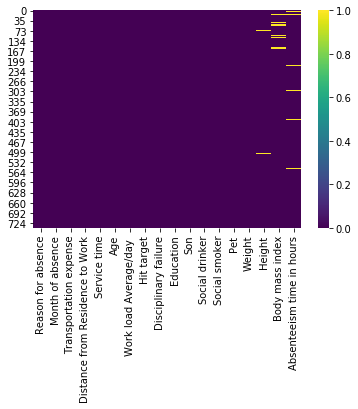

In [19]:
#Using Seaborn to check Missing values
sns.heatmap(df_copy.isnull(), cmap='viridis')

In [20]:
#From above graph, we can see yellow color horizontal lines. Those are missing values

In [21]:
#Columns to be imputed
cols_to_impute = ['Height', 'Body mass index', 'Absenteeism time in hours']

In [22]:
#Appending the columns to new_df
for column in remove_missing_value_cols:
    new_df = pd.concat([new_df, df_copy[column]], axis=1)

In [23]:
#Checking for missing values existed while concatenating
new_df.isnull().sum()

ID                                  0
Day of the week                     0
Seasons                             0
Reason for absence                 52
Month of absence                   52
Transportation expense             52
Distance from Residence to Work    52
Service time                       52
Age                                52
Work load Average/day              52
Hit target                         52
Disciplinary failure               52
Education                          52
Son                                52
Social drinker                     52
Social smoker                      52
Pet                                52
Weight                             52
dtype: int64

In [24]:
#Dropping nans from the subset of variables which had missing values
new_df = new_df.dropna(subset=remove_missing_value_cols)

In [25]:
new_df.isnull().sum()

ID                                 0
Day of the week                    0
Seasons                            0
Reason for absence                 0
Month of absence                   0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
dtype: int64

### From the above df, we can say that we need to Impute the data. As we are having <30% Missing data

In [26]:
#We try Mean,Median and KNN methods to impute data. Then, we select 1 of them which gives close
#result as the original value holds

In [27]:
#Taking Height[23] value
df_copy['Height'][23]

168.0

In [326]:
#Actual value = 168.0
#Imputed by Mean = 172.1
#Imputed by Median = 170.0
#Imputed by KNN = 172.0

In [28]:
#Make df_copy['Height'][23]=NaN
df_copy['Height'][23] = np.NaN

In [150]:
#Imputing the df_copy['Height'] with Mean method
df_copy['Height'] = df_copy['Height'].fillna(df_copy['Height'].mean())

In [141]:
#Now, check df_copy['Height'][23]
df_copy['Height'][23]

nan

In [140]:
#Now, load data again and make the value NaN

In [144]:
#Making df_copy['Height'][23]
print(df_copy['Height'][23])
df_copy['Height'][23] = np.NaN

nan


/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
#Now, Impute with Median method
df_copy['Height'] = df_copy['Height'].fillna(df_copy['Height'].median())

In [127]:
#Now, check df_copy['Height'][23]
df_copy['Height'][23]

170.0

In [153]:
#Again, load the data and make df['Height'][23] = NaN
df_copy_copy = pd.read_excel('Absenteeism_at_work_Project.xls')
df_copy['Height'][23] = np.NaN

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df_copy = pd.DataFrame(KNN(k = 3).complete(df_copy), columns=df_copy.columns)

Imputing row 1/688 with 0 missing, elapsed time: 0.324
Imputing row 101/688 with 0 missing, elapsed time: 0.325
Imputing row 201/688 with 0 missing, elapsed time: 0.326
Imputing row 301/688 with 0 missing, elapsed time: 0.326
Imputing row 401/688 with 0 missing, elapsed time: 0.327
Imputing row 501/688 with 1 missing, elapsed time: 0.328
Imputing row 601/688 with 0 missing, elapsed time: 0.328


In [35]:
#Check for the value which has been imputed
df_copy['Height'][23]

172.0

In [43]:
#So, we imputed data with Median Method

In [29]:
#Imputing the whole df with median method
df_copy = df_copy.fillna(df.median())

In [30]:
#Now, add these 3 variables also to new_df
for col in cols_to_impute:
    new_df = pd.concat([new_df, df_copy[col]], axis=1)

In [31]:
#Checking any missing has been added while concatenating
new_df.isnull().sum()

ID                                 0
Day of the week                    0
Seasons                            0
Reason for absence                 0
Month of absence                   0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [32]:
#Make a copy of the new_df till we have processed
after_missing_analysis = new_df.copy()

In [33]:
#Making 'Reason for absence' column as 4 groups like Reason 1, Reason 2, Reason 3, Reason 4
#Reason 1 includes Reasons from 1-14 as peer ICD
#Reason 2 includes Reasons from 15-17
#Reason 3 includes Reasons from 18-21
#Reason 4 includes Reasons from 22-28
#By grouping, we can do analysis on which reason more absenteeism is being noted

In [34]:
#We have imputed the data now. So, we convert the type of few variables as they are not much meaningful
#Reason for absence is in float. As it isn't not to be in float, to be in integer

### Get dummies for 'Reason for absence' column

In [35]:
reason_cols = pd.get_dummies(new_df['Reason for absence'])

In [36]:
reason_cols.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
#Now, we can remove Reason 0. As it doesn't have any reason mentioned by ICD. And remove unnecessary columns like 19.1886
reason_cols.drop(0, axis=1, inplace=True)

In [38]:
#Chacking the column names
reason_cols.columns

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0,
              24.0, 25.0, 26.0, 27.0, 28.0],
             dtype='float64')

In [39]:
reason_type_1 = reason_cols.loc[:,:14].max(axis=1)
reason_type_2 = reason_cols.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_cols.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_cols.loc[:, 22:28].max(axis=1)

In [40]:
#Remove 'Reason for absence' column from new_df and append the above 4 mentioned as columns(reason_type_1-reason_type_4)
new_df.drop('Reason for absence', axis=1, inplace=True)

In [41]:
#Appending 4 reason types
new_df = pd.concat([new_df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis=1)

In [42]:
#printing the column names to rename required
new_df.columns.values

array(['ID', 'Day of the week', 'Seasons', 'Month of absence',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

In [44]:
#Rename the columns 0,1,2,3 to proper names
new_column_names = ['ID', 'Day of the week', 'Seasons', 'Month of absence',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason 1', 'Reason 2', 'Reason 3', 'Reason 4']

new_df.columns = new_column_names
print("New column names:", new_df.columns)

New column names: Index(['ID', 'Day of the week', 'Seasons', 'Month of absence',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason 1', 'Reason 2', 'Reason 3',
       'Reason 4'],
      dtype='object')


In [45]:
#Now, update the variables which we wanted to make categorised
categorical_var = ['ID', 'Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Month of absence', 'Day of the week',
                   'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker',
                   'Pet']

In [46]:
#Convert all field type to int
for col in new_df.columns:
    new_df[col] = new_df[col].apply(lambda value: int(value))

In [47]:
#Making the variables which have mentioned above to categorical in df
for var in categorical_var:
    new_df[var] = pd.Categorical(new_df[var])

### EDA

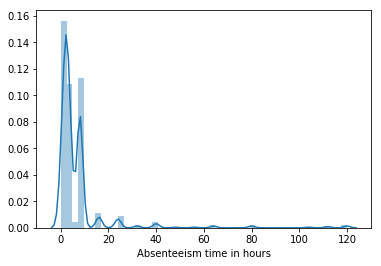

In [48]:
#Univariate Analysis
sns.distplot(new_df['Absenteeism time in hours'])

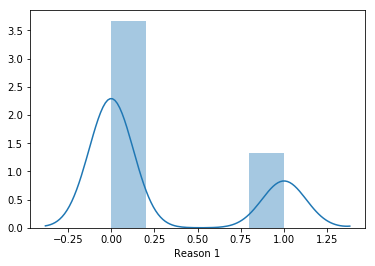

In [49]:
sns.distplot(new_df['Reason 1'])

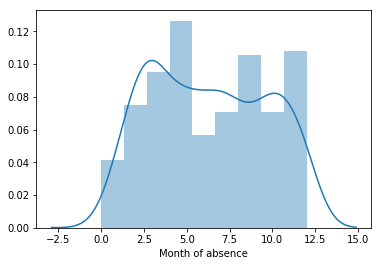

In [50]:
sns.distplot(new_df['Month of absence'])

In [53]:
#Bivariate Analysis

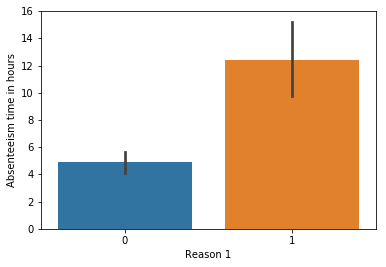

In [51]:
#Bar graph 'Reason 1' vs 'Absenteeism time in hours'
sns.barplot(x='Reason 1', y='Absenteeism time in hours', data=new_df)

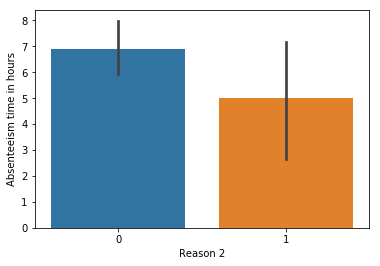

In [52]:
#Bar graph 'Reason 2' vs 'Absenteeism time in hours'
sns.barplot(x='Reason 2', y='Absenteeism time in hours', data=new_df)

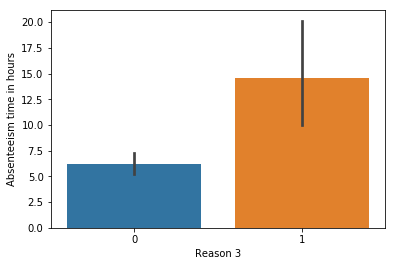

In [54]:
#Bar graph 'Reason 3' vs 'Absenteeism time in hours'
sns.barplot(x='Reason 3', y='Absenteeism time in hours', data=new_df)

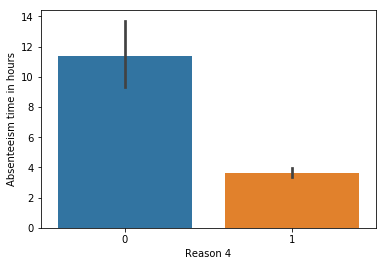

In [55]:
#Bar graph 'Reason 4' vs 'Absenteeism time in hours'
sns.barplot(x='Reason 4', y='Absenteeism time in hours', data=new_df)

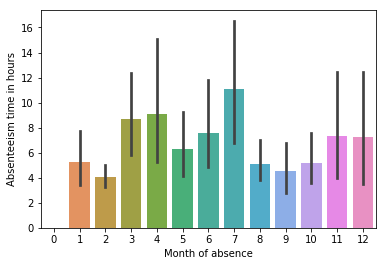

In [56]:
#Month of absence vs Absenteeism time in hours
sns.barplot('Month of absence', 'Absenteeism time in hours', data=new_df)

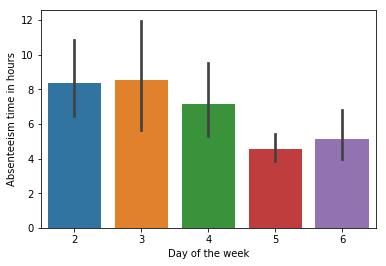

In [57]:
#Day of the week vs 'Absenteeism time in hours'
sns.barplot('Day of the week', 'Absenteeism time in hours', data=new_df)

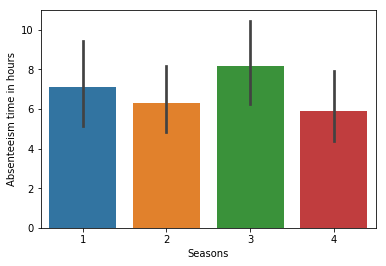

In [58]:
#Seasons vs Absenteeism time in hours
sns.barplot('Seasons', 'Absenteeism time in hours', data=new_df)

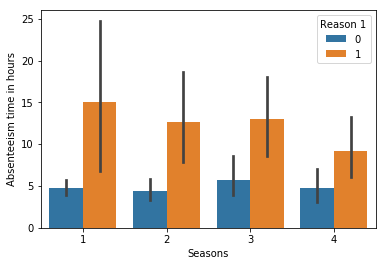

In [59]:
#Seasons vs 'Absenteeism time in hours' with Reason 1 as hue
sns.barplot('Seasons', 'Absenteeism time in hours', data=new_df, hue='Reason 1')

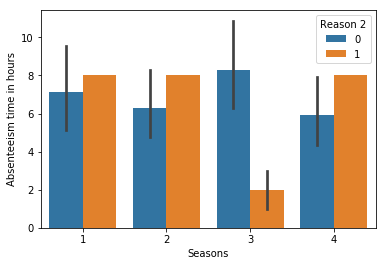

In [60]:
sns.barplot('Seasons', 'Absenteeism time in hours', data=new_df, hue='Reason 2')

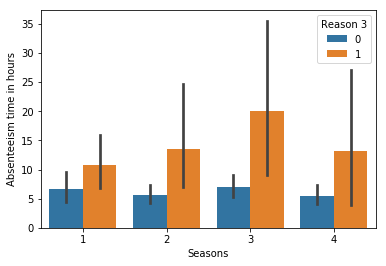

In [61]:
sns.barplot('Seasons', 'Absenteeism time in hours', data=new_df, hue='Reason 3')

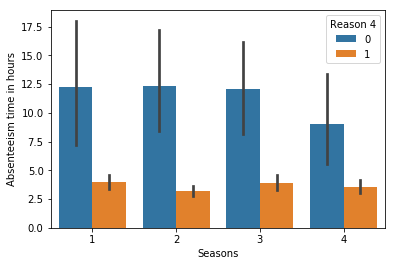

In [62]:
sns.barplot('Seasons', 'Absenteeism time in hours', data=new_df, hue='Reason 4')

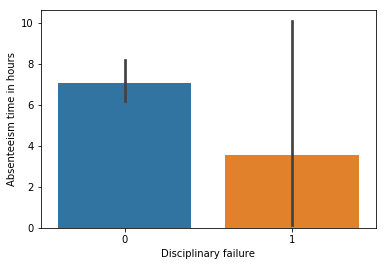

In [63]:
#'Disciplinary failure' vs 'Absenteeism time in hours'
sns.barplot('Disciplinary failure', 'Absenteeism time in hours', data=new_df)

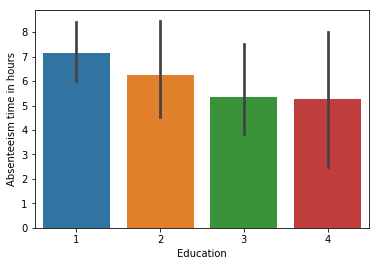

In [64]:
#Education vs Absenteeism time in hours
sns.barplot('Education', 'Absenteeism time in hours', data=new_df)

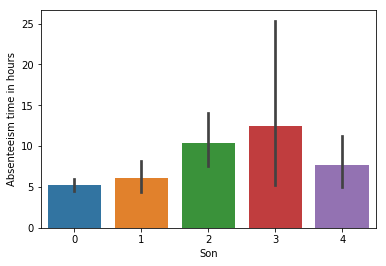

In [65]:
#Son vs Absenteeism time in hours
sns.barplot('Son', 'Absenteeism time in hours', data=new_df)

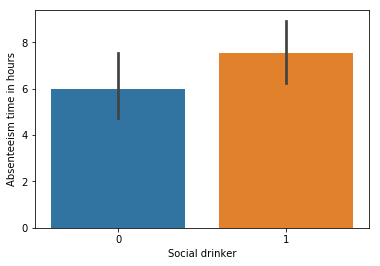

In [66]:
#Social drinker vs Absenteeism time in hours
sns.barplot('Social drinker', 'Absenteeism time in hours', data=new_df)

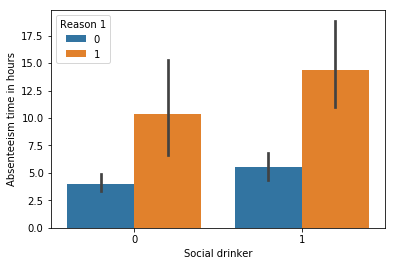

In [67]:
#Social drinker vs Absenteeism time in hours with Reason 1 as hue
sns.barplot('Social drinker', 'Absenteeism time in hours', data=new_df, hue='Reason 1')

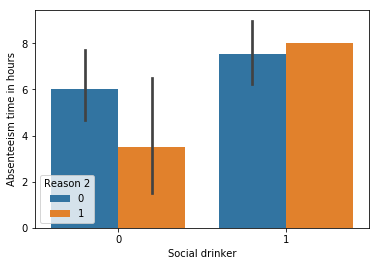

In [68]:
#Social drinker vs Absenteeism time in hours with Reason 2 as hue
sns.barplot('Social drinker', 'Absenteeism time in hours', data=new_df, hue='Reason 2')

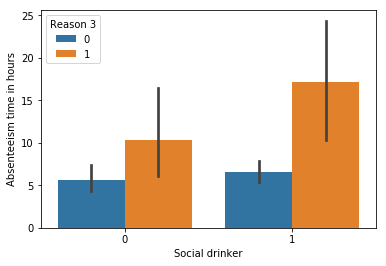

In [69]:
#Social drinker vs Absenteeism time in hours with Reason 3 as hue
sns.barplot('Social drinker', 'Absenteeism time in hours', data=new_df, hue='Reason 3')

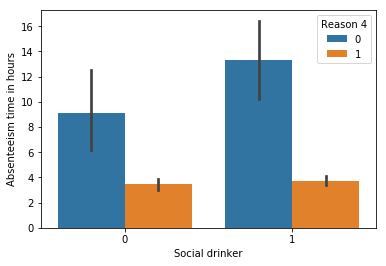

In [70]:
#Social drinker vs Absenteeism time in hours with Reason 4 as hue
sns.barplot('Social drinker', 'Absenteeism time in hours', data=new_df, hue='Reason 4')

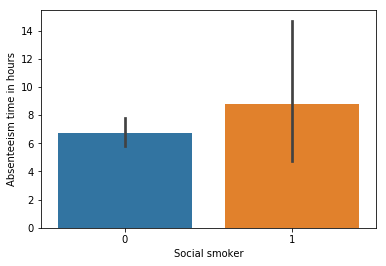

In [71]:
#Social smoker vs Absenteeism time in hours
sns.barplot('Social smoker', 'Absenteeism time in hours', data=new_df)

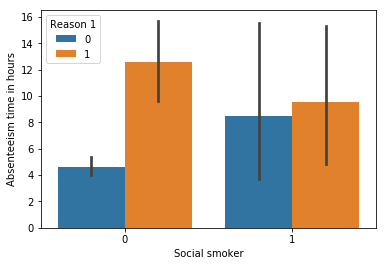

In [72]:
#Social smoker vs Absenteeism time in hours with Reason 1 as hue
sns.barplot('Social smoker', 'Absenteeism time in hours', data=new_df, hue='Reason 1')

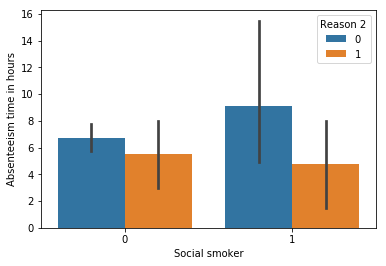

In [73]:
#Social smoker vs Absenteeism time in hours with Reason 2 as hue
sns.barplot('Social smoker', 'Absenteeism time in hours', data=new_df, hue='Reason 2')

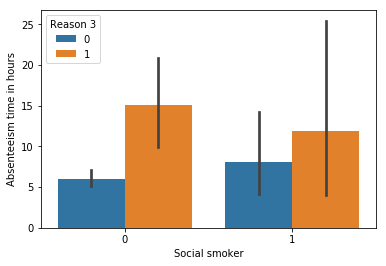

In [74]:
#Social smoker vs Absenteeism time in hours with Reason 3 as hue
sns.barplot('Social smoker', 'Absenteeism time in hours', data=new_df, hue='Reason 3')

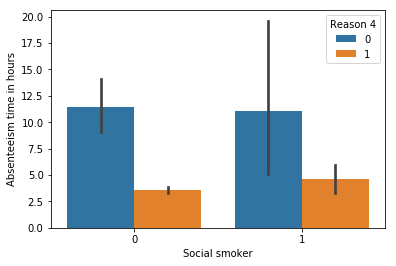

In [75]:
#Social smoker vs Absenteeism time in hours with Reason 4 as hue
sns.barplot('Social smoker', 'Absenteeism time in hours', data=new_df, hue='Reason 4')

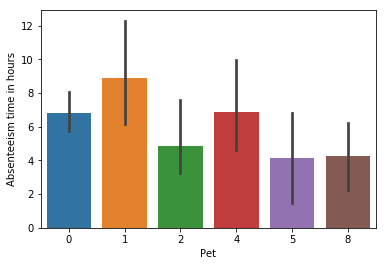

In [76]:
#Pet vs Absenteeism time in hours
sns.barplot('Pet', 'Absenteeism time in hours', data=new_df)

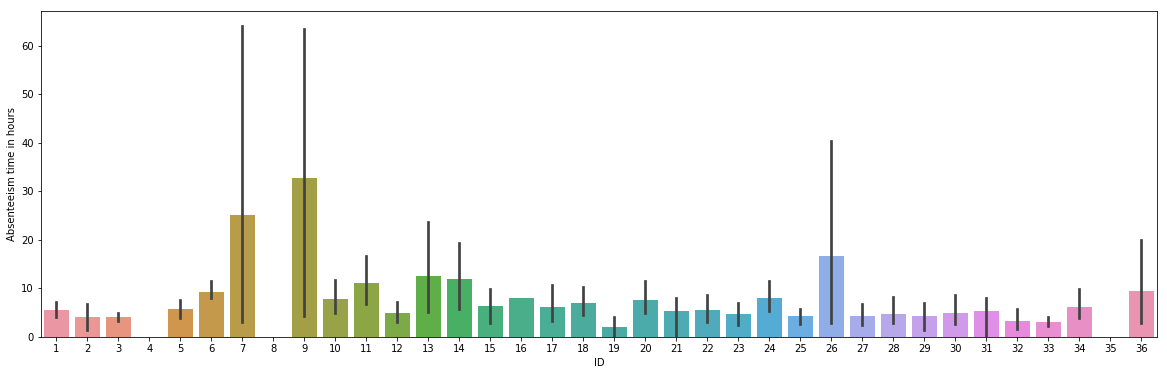

In [77]:
#ID vs Absenteeism time in hours
plt.figure(figsize=(20,6))
sns.barplot('ID', 'Absenteeism time in hours', data=new_df)

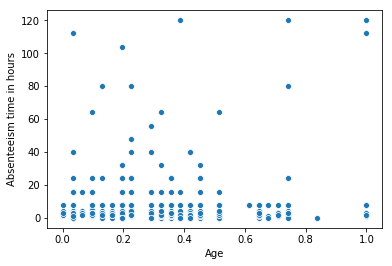

In [153]:
#Age vs Absenteeism time in hours
sns.scatterplot('Age', 'Absenteeism time in hours', data=new_df)

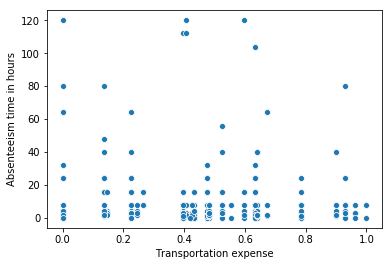

In [157]:
#Transportation expense vs Absenteeism time in hours
sns.scatterplot('Transportation expense', 'Absenteeism time in hours', data=new_df)

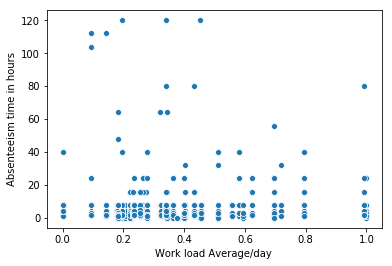

In [224]:
#Word load Average/day  vs Absenteeism time in hours
sns.scatterplot('Work load Average/day ', 'Absenteeism time in hours', data=new_df)

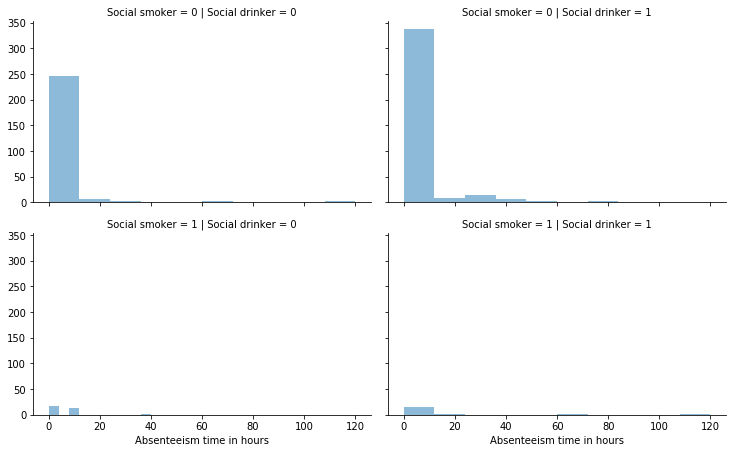

In [196]:
grid = sns.FacetGrid(new_df, row='Social smoker', col='Social drinker', 
                     height=3.2, aspect=1.6)
grid.map(plt.hist, 'Absenteeism time in hours', alpha=.5, bins=10)
grid.add_legend()

## Outlier Analysis

In [78]:
#Before doing Outlier Analysis, make a copy of the dataframe which we had till now
df_before_outlier = new_df.copy()

In [79]:
new_df.columns

Index(['ID', 'Day of the week', 'Seasons', 'Month of absence',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason 1', 'Reason 2', 'Reason 3',
       'Reason 4'],
      dtype='object')

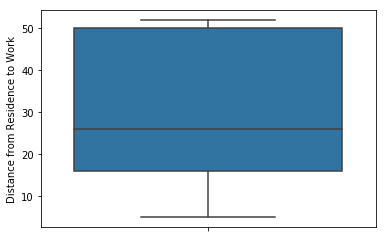

In [80]:
#Plot boxplot to visualize outliers
sns.boxplot(y='Distance from Residence to Work', data=new_df)

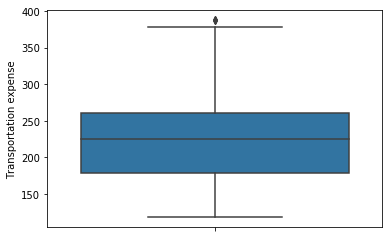

In [81]:
sns.boxplot(y='Transportation expense', data=new_df)

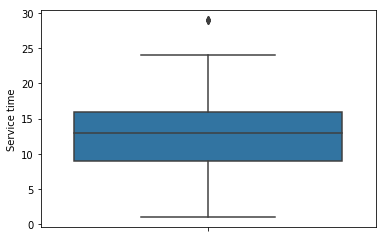

In [82]:
sns.boxplot(y='Service time', data=new_df)

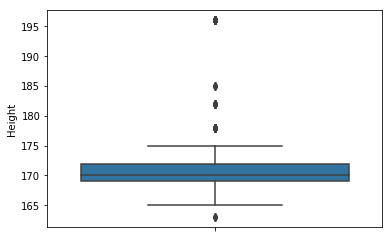

In [83]:
sns.boxplot(y='Height', data=new_df)

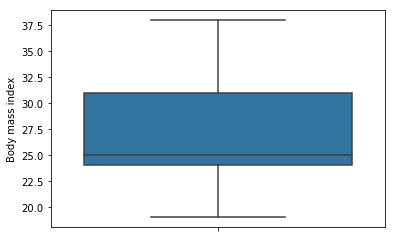

In [84]:
sns.boxplot(y='Body mass index', data=new_df)

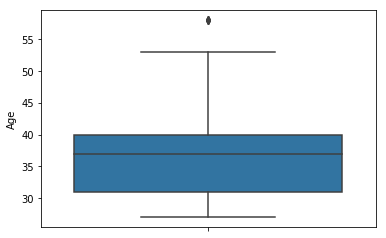

In [85]:
sns.boxplot(y='Age', data=new_df)

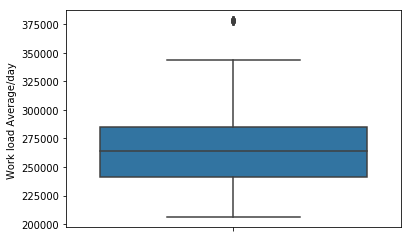

In [86]:
sns.boxplot(y='Work load Average/day ', data=new_df)

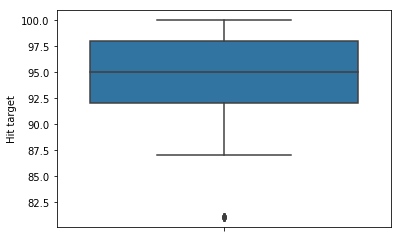

In [87]:
sns.boxplot(y='Hit target', data=new_df)

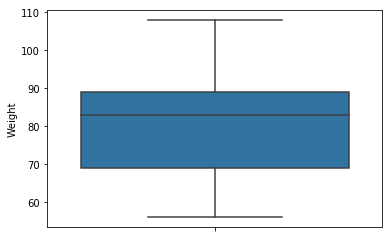

In [88]:
sns.boxplot(y='Weight', data=new_df)

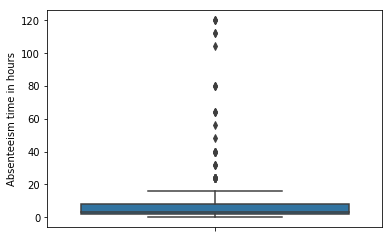

In [89]:
sns.boxplot(y='Absenteeism time in hours', data=new_df)

In [90]:
#There are no outliers for below mentioned columns. No need to impute those variables
no_outliers = ['Body mass index', 'Distance from Residence to Work', 'Weight']

### Loop through all continuous variables to remove outliers

In [91]:
#Making a list of continuous variables
cont_var = [col for col in new_df.columns if col not in categorical_var]

In [ ]:
#Detect & delete outliers from data
"""for col in cont_var:
#     print(col)
    if col in no_outliers:
        continue
        
    q75, q25 = np.percentile(new_df[col],[75,25]) #Calculating 25th & 75th percentiles
    iqr = q75-q25 #Inter-Quartile Range
    
    #Calculating Minimum
    minimum = q25 - (iqr*1.5)
    
    #Calculating Maximum
    maximum = q75 - (iqr*1.5)
    
    #Dropping the outliers which are less than Minimum value
    new_df = new_df.drop(new_df[new_df[col] < minimum].index)
    
    #Dropping the outliers which are greater than the Maximum value
    new_df = new_df.drop(new_df[new_df[col] > maximum].index)
    
    #Replacing outliers with NaN
    new_df.loc[new_df[col]<minimum, col] = np.NaN
    new_df.loc[new_df[col]>maximum, col] = np.NaN """

In [ ]:
#Imputation
#new_df = pd.DataFrame(KNN(k=3).complete(new_df), columns=new_df.columns)

### Correlation Analysis

In [92]:
continuous_cols = df.loc[:,cont_var]

In [93]:
continuous_cols.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
0,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239554.0,97.0,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239554.0,97.0,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239554.0,97.0,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,2.0


In [94]:
#Correlation Matrix
df_corr = round(continuous_cols.corr(),2)

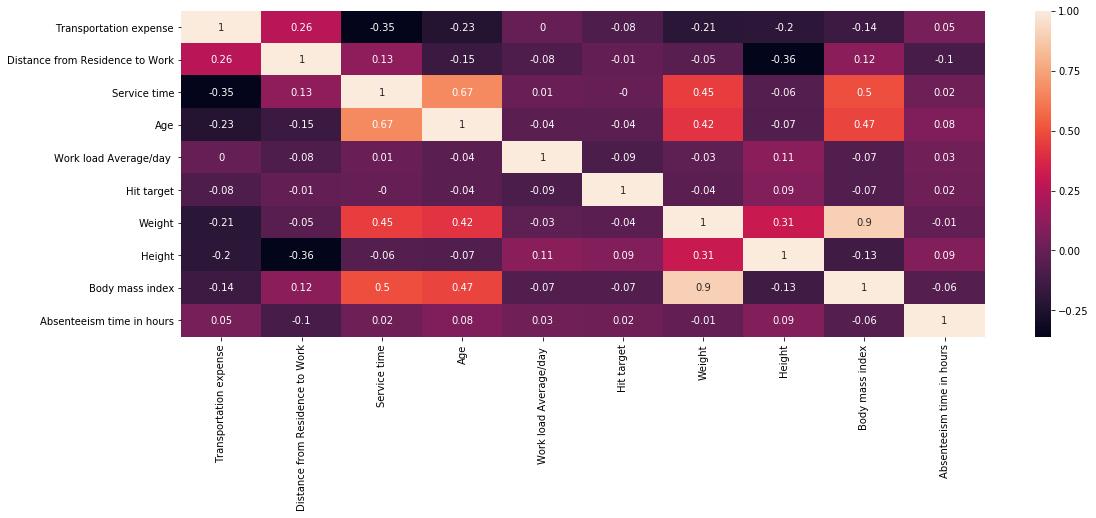

In [95]:
plt.figure(figsize=(18,6))
sns.heatmap(df_corr, cbar=True, annot=True)

### Feature Scaling

In [98]:
#We, check for the data whether it is Normally distributed or not
#Before that copy the dataframe which we have used till now
df_before_scaling = new_df.copy()

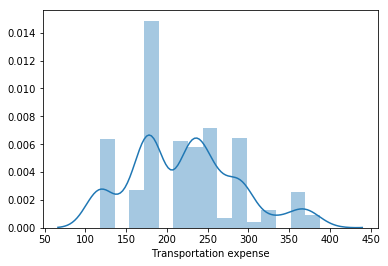

In [99]:
#Normality check
sns.distplot(new_df['Transportation expense'])

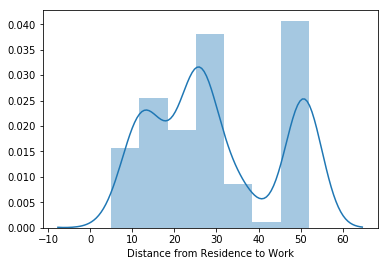

In [100]:
#Normality check for Distance from residence to Work
sns.distplot(new_df['Distance from Residence to Work'])

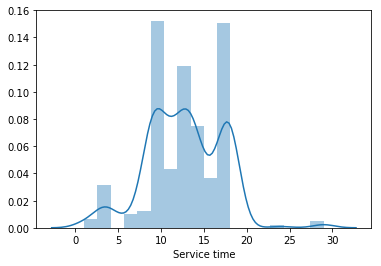

In [101]:
#Normality check for Service time
sns.distplot(new_df['Service time'])

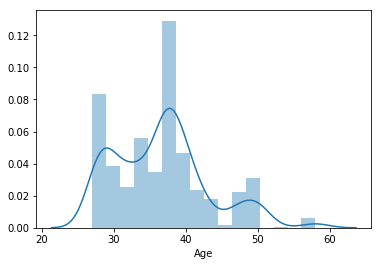

In [102]:
sns.distplot(new_df['Age'])

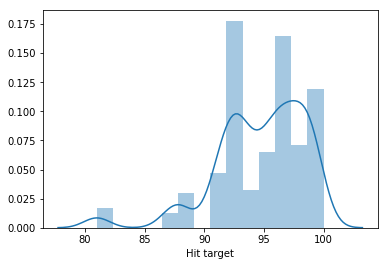

In [103]:
sns.distplot(new_df['Hit target'])

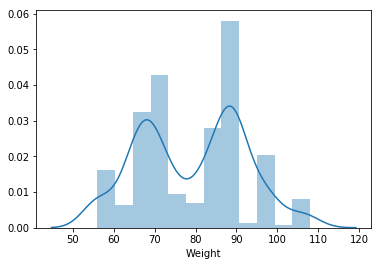

In [104]:
sns.distplot(new_df['Weight'])

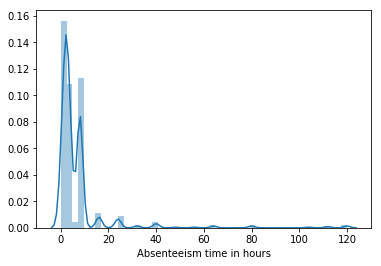

In [105]:
sns.distplot(new_df['Absenteeism time in hours'])

In [106]:
#We can say that data is NOT NORMALLY DISTRIBUTED.So, we use Normalization to scale the data

In [107]:
#Normalization for all continuous variables
for variable in cont_var:
    if variable == 'Absenteeism time in hours':
        continue
    new_df[variable] = (new_df[variable] - min(new_df[variable])) / (max(new_df[variable]) - min(new_df[variable]))

In [108]:
#Make a copy of the new_df
scaled_df = new_df.copy()

In [109]:
#Before building model, we should pass the numerical data only. We have some categorical data also as we modified for preprocessing.
#Convert categorical to numerical
for col in categorical_var:
    new_df[col] = new_df[col].apply(lambda value: int(value))

### Separating features & Target variable into separate variables & Splitting data

In [110]:
#Keeping all features except target('Absenteeism time in hours') in a variable named X
X = new_df.drop('Absenteeism time in hours', axis=1)

#Keeping target variable in a variable named y
y = new_df['Absenteeism time in hours']

In [111]:
#Splitting data
from sklearn.model_selection import train_test_split #Required library for splitting the data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

In [112]:
#Check the shape of the splitted data
X_train.shape

(481, 23)

In [113]:
X_test.shape

(207, 23)

In [114]:
y_train.shape

(481,)

In [115]:
X_train.head()

,ID,Day of the week,Seasons,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Reason 1,Reason 2,Reason 3,Reason 4
240,18,3,1,7,0.785185,0.234043,0.107143,0.032258,0.401204,0.894737,...,0,0,0,0.538462,0.575758,0.315789,0,0,0,1
72,3,4,4,10,0.225926,0.978723,0.607143,0.354839,0.274896,0.631579,...,1,0,0,0.634615,0.212121,0.631579,0,0,0,1
28,11,4,1,8,0.633333,0.659574,0.428571,0.193548,0.000000,0.578947,...,1,0,1,0.653846,0.272727,0.578947,0,0,1,0
588,3,4,2,2,0.225926,0.978723,0.607143,0.354839,0.337244,0.842105,...,1,0,0,0.634615,0.212121,0.631579,0,0,0,1
494,20,2,1,8,0.525926,0.957447,0.357143,0.290323,0.253690,0.631579,...,1,0,0,0.173077,0.151515,0.210526,0,0,0,1


In [116]:
y_train.head()

240    8
72     8
28     8
588    2
494    3
Name: Absenteeism time in hours, dtype: int64

### Building Model

### Linear Regression

In [117]:
#Importing required library/package for Linear Regression
import statsmodels.api as sm

In [119]:
model = sm.OLS(y_train, X_train.astype(float)).fit()

In [120]:
#Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.360
Model:                                   OLS   Adj. R-squared:                  0.328
Method:                        Least Squares   F-statistic:                     11.20
Date:                       Thu, 12 Sep 2019   Prob (F-statistic):           6.37e-32
Time:                               10:40:10   Log-Likelihood:                -1909.1
No. Observations:                        481   AIC:                             3864.
Df Residuals:                            458   BIC:                             3960.
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.1216      0.076     -1.602      0.110      -0.271       0.028
Day of the week                    -0.8273      0.440     -1.882      0.060      -1.691       0.036
Seasons                            -0.3951      0.653     -0.605      0.546      -1.679       0.888
Month of absence                   -0.1059      0.234     -0.452      0.652      -0.566       0.355
Transportation expense              2.7360      3.302      0.829      0.408      -3.753       9.226
Distance from Residence to Work    -6.2911      3.219     -1.955      0.051     -12.616       0.034
Service time                        3.8318      7.226      0.530      0.596     -10.368      18.031
Age                                 7.2021      4.492      1.603      0.110      -1.626      16.030
Work load Average/day              -3.0503      3.143     -0.970      0.332      -9.227       3.126
Hit target                          2.7868      3.618      0.770      0.442      -4.323       9.897
Disciplinary failure                6.8256      6.214      1.098      0.273      -5.385      19.036
Education                          -1.8120      1.157     -1.566      0.118      -4.086       0.462
Son                                 1.3710      0.673      2.038      0.042       0.049       2.693
Social drinker                      0.7987      2.009      0.398      0.691      -3.150       4.747
Social smoker                      -2.3930      2.621     -0.913      0.362      -7.544       2.758
Pet                                 0.0286      0.572      0.050      0.960      -1.096       1.154
Weight                             -3.0388     11.616     -0.262      0.794     -25.867      19.789
Height                              4.6230      7.535      0.614      0.540     -10.184      19.430
Body mass index                    -3.4646     12.005     -0.289      0.773     -27.057      20.128
Reason 1                           21.1415      5.819      3.633      0.000       9.706      32.577
Reason 2                           11.2405      8.415      1.336      0.182      -5.297      27.778
Reason 3                           19.4849      6.036      3.228      0.001       7.623      31.347
Reason 4                           10.4437      5.680      1.839      0.067      -0.719      21.606
==============================================================================
Omnibus:                      510.307   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21092.423
Skew:                           4.896   Prob(JB):                         0.00
Kurtosis:                      33.928   Cond. No.                         666.
===========

### If the F-statistic is Lower, then the model is Less-Significant
### But, in this case, we don't have much F-statistic. So, the model is not much significant

In [121]:
#Prediction
predictions = model.predict(X_test)

In [122]:
#Making a dataframe for both predicted values and the True values
true_pred_df = pd.DataFrame({'True Value': y_test, 'Predicted value': predictions})

In [123]:
true_pred_df.head()

,True Value,Predicted value
435,3,2.33149
353,4,15.7116
63,3,1.22379
327,3,11.0361
511,2,4.96336


Text(0, 0.5, 'Predictions')

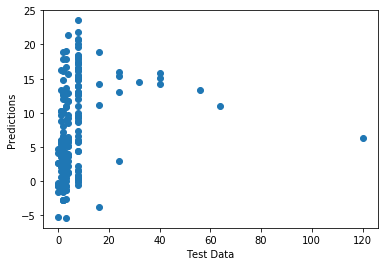

In [124]:
#Scatter plot for test data vs predictions
plt.scatter(y_test, predictions)
plt.xlabel('Test Data')
plt.ylabel('Predictions')

In [125]:
#From the above plot, we can say that the data is not fitted well

### Regression Evaluation Metrics

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Square Error

### We need to calculate the above metrics for other models too. So, we keep all these calculations in a function

In [126]:
from sklearn import metrics

In [127]:
def evaluate_metrics(y_test, predictions):
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
    print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [132]:
#Calculating Mean Absolute Percentage Error
def mape(true_target, prediction_target):
    result = np.mean(np.abs((true_target - prediction_target) / true_target)) * 100
    return result

In [129]:
#Calling evaluate_metrics for Linear Regression
evaluate_metrics(y_test, predictions)

Mean Absolute Error:  6.399771228648575
Mean Squared Error:  138.76016669174015
Root Mean Squared Error:  11.779650533514998


### Decision Tree

In [136]:
#Importing library for building decision tree regression model
from sklearn.tree import DecisionTreeRegressor

In [137]:
#Creating an instance to DecisionTreeRegressor class
dtr = DecisionTreeRegressor()

In [138]:
#Fitting the model on train data
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [139]:
#Prediction
pred_dtr = dtr.predict(X_test)

Text(0, 0.5, 'Predictions')

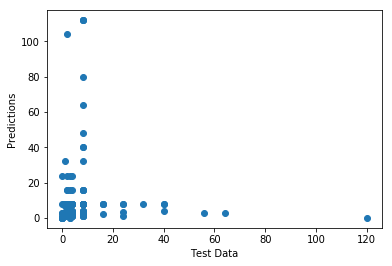

In [140]:
#Using scatter plot, see how data is fitted
plt.scatter(y_test, pred_dtr)
plt.xlabel('Test Data')
plt.ylabel('Predictions')

In [141]:
#From the above plot, we can say that the data is not fitted properly to Decision Tree as well

In [143]:
#Evaluating Decision Tree Regressor
evaluate_metrics(y_test, pred_dtr)

Mean Absolute Error:  8.245571658615138
Mean Squared Error:  423.42444981213094
Root Mean Squared Error:  20.577279942016897


### Random Forest Regressor

In [146]:
#importing required library for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [147]:
#Creating an instance to the RandomForestRegressor
rfr = RandomForestRegressor()

In [148]:
#Fit the model to our data
rfr.fit(X_train, y_train)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [149]:
#Prediction
pred_rfr = rfr.predict(X_test)

Text(0, 0.5, 'Predictions')

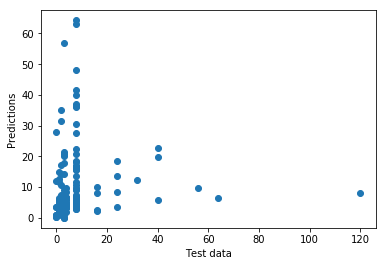

In [150]:
#Using scatter plot to see how the data is fitted to the model we have built
plt.scatter(y_test, pred_rfr)
plt.xlabel('Test data')
plt.ylabel('Predictions')

In [151]:
#From the above plot also, we can clearly say that the data is not fitted well for Random Forest Regressor also

In [152]:
#Evaluation Metrics for Random Forest
evaluate_metrics(y_test, pred_rfr)

Mean Absolute Error:  7.149990606548579
Mean Squared Error:  217.9400147883491
Root Mean Squared Error:  14.762791564888705


### From all the above 3 models, we can say that Linear Regression is fitted a little bit well when compared to Decision Tree and Random Forest models as Linear Regression model only has minimum RMSE value than all

### We can improve the performance by removing some features and build model again

In [174]:
#We can remove feature 'Weight' as 'Body mass index' is calculated based on Weight and try to build a model
modified_X = new_df.drop(['Weight', 'Absenteeism time in hours'], axis=1)

#Target
new_y = new_df['Absenteeism time in hours']

In [182]:
#Splitting data
from sklearn.model_selection import train_test_split #Required library for splitting the data into train & test

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=56)

In [184]:
#X_train shape and data checking
X_train2.shape

(481, 23)

In [185]:
y_train2.shape

(481,)

In [186]:
X_train2.head()

,ID,Day of the week,Seasons,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Reason 1,Reason 2,Reason 3,Reason 4
625,3,5,2,3,0.225926,0.978723,0.607143,0.354839,0.094116,0.947368,...,1,0,0,0.634615,0.212121,0.631579,0,0,0,1
566,28,3,4,12,0.396296,0.446809,0.285714,0.032258,0.431481,0.894737,...,0,0,2,0.250000,0.181818,0.263158,0,0,0,1
100,36,4,4,12,0.000000,0.170213,0.607143,0.741935,0.320229,0.842105,...,1,0,0,0.807692,0.454545,0.315789,0,0,0,1
369,34,3,2,2,0.000000,0.106383,0.321429,0.322581,0.265374,0.789474,...,0,0,0,0.519231,0.272727,0.473684,0,0,0,1
441,34,2,3,6,0.000000,0.106383,0.321429,0.322581,0.277741,0.736842,...,0,0,0,0.519231,0.272727,0.473684,0,0,0,1


In [188]:
y_train2.head()

625    3
566    2
100    2
369    2
441    3
Name: Absenteeism time in hours, dtype: int64

### Re-Modeling

### Linear Regression

In [189]:
#Building model
model1 = sm.OLS(y_train2, X_train2.astype(float)).fit()

In [190]:
#Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.336
Model:                                   OLS   Adj. R-squared:                  0.303
Method:                        Least Squares   F-statistic:                     10.09
Date:                       Thu, 12 Sep 2019   Prob (F-statistic):           1.28e-28
Time:                               14:52:22   Log-Likelihood:                -1863.7
No. Observations:                        481   AIC:                             3773.
Df Residuals:                            458   BIC:                             3869.
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.1178      0.068     -1.737      0.083      -0.251       0.015
Day of the week                    -0.5354      0.400     -1.339      0.181      -1.321       0.250
Seasons                             0.4850      0.584      0.830      0.407      -0.663       1.633
Month of absence                   -0.0113      0.221     -0.051      0.959      -0.446       0.423
Transportation expense              0.5615      2.918      0.192      0.847      -5.172       6.295
Distance from Residence to Work    -6.2899      2.691     -2.338      0.020     -11.577      -1.003
Service time                        0.1830      6.400      0.029      0.977     -12.393      12.759
Age                                 5.2375      4.226      1.239      0.216      -3.068      13.543
Work load Average/day               0.3571      2.591      0.138      0.890      -4.734       5.448
Hit target                          6.3875      3.353      1.905      0.057      -0.202      12.977
Disciplinary failure                4.3160      5.217      0.827      0.408      -5.936      14.568
Education                          -1.3514      1.025     -1.318      0.188      -3.366       0.663
Son                                 0.8944      0.589      1.518      0.130      -0.264       2.053
Social drinker                      2.9887      1.753      1.705      0.089      -0.455       6.433
Social smoker                       1.2769      2.382      0.536      0.592      -3.404       5.958
Pet                                -0.1995      0.514     -0.388      0.698      -1.210       0.810
Weight                             -3.0764      9.775     -0.315      0.753     -22.287      16.134
Height                              1.7386      6.455      0.269      0.788     -10.946      14.423
Body mass index                    -2.0185      9.977     -0.202      0.840     -21.625      17.588
Reason 1                           10.8960      4.953      2.200      0.028       1.163      20.629
Reason 2                            3.7779      7.456      0.507      0.613     -10.874      18.430
Reason 3                           13.6576      5.152      2.651      0.008       3.533      23.782
Reason 4                            4.4766      4.843      0.924      0.356      -5.040      13.993
==============================================================================
Omnibus:                      582.045   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41776.840
Skew:                           5.870   Prob(JB):                         0.00
Kurtosis:                      47.121   Cond. No.                         614.
===========

In [191]:
#Prediction
preds_model1 = model1.predict(X_test2)

In [192]:
#dataframe which compares true value and predicted values
model1_pred_df = pd.DataFrame({'True value': y_test2, 'Predicted value': preds_model1})

In [194]:
model1_pred_df.head()

,True value,Predicted value
222,24,13.5586
372,3,3.87326
568,2,3.57525
405,3,4.11095
265,1,3.01505


In [195]:
#Evaluation
evaluate_metrics(y_test2, preds_model1)

Mean Absolute Error:  6.280060148781313
Mean Squared Error:  204.02823409887733
Root Mean Squared Error:  14.283845214047838


### Random Forest

In [204]:
# Decision Tree
rf2 = RandomForestRegressor()

In [205]:
rf2.fit(X_train2, y_train2)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [207]:
#Prediction
pred_rf2 = rf2.predict(X_test2)

In [209]:
#True value and Predicted values dataframe
pred_true_rf2_df = pd.DataFrame({'True value': y_test2, 'Predicted value': pred_rf2})

In [210]:
pred_true_rf2_df.head()

,True value,Predicted value
222,24,11.4
372,3,5.9
568,2,2.0
405,3,0.8
265,1,3.1


In [211]:
#Evaluation
evaluate_metrics(y_test2, pred_rf2)

Mean Absolute Error:  6.166727628249367
Mean Squared Error:  213.13773254598138
Root Mean Squared Error:  14.599237396041664


### Decision Tree

In [212]:
dt2 = DecisionTreeRegressor()

In [213]:
dt2.fit(X_train2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [215]:
#Prediction
dt2_pred = dt2.predict(X_test2)

In [216]:
#Dataframe which shows both True value and Predicted values
df_dt2_pred_true = pd.DataFrame({'True value': y_test2, 'Predicted value': dt2_pred})

In [217]:
df_dt2_pred_true.head()

,True value,Predicted value
222,24,24.0
372,3,8.0
568,2,2.0
405,3,8.0
265,1,1.0


In [220]:
#Evaluation
evaluate_metrics(y_test2, dt2_pred)

Mean Absolute Error:  6.233494363929148
Mean Squared Error:  249.7332259796028
Root Mean Squared Error:  15.802949913848451


In [222]:
#Making note of important features
features = pd.DataFrame()
features['Feature'] = X_train.columns
rff = RandomForestRegressor()
rff.fit(X_train, y_train)
features['Importance'] = rff.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


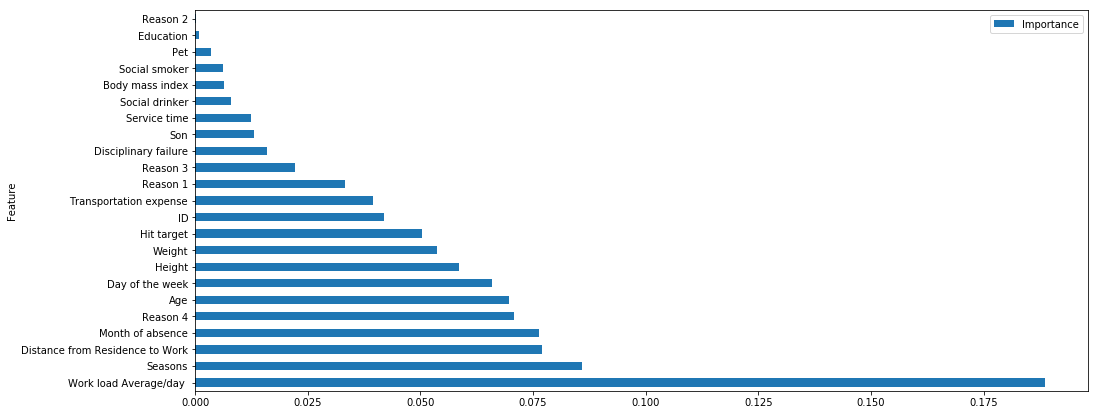

In [223]:
#Plotting the feature importance
features.plot(kind='barh', figsize=(16,7))

In [225]:
#Make a list of important features
imp_features = ['Work load Average/day ', 'Seasons', 'Distance from Residence to Work', 'Month of absence',
               'Reason 4', 'Age', 'Day of the week', 'Height', 'Weight', 'Hit target']

In [229]:
#Making final_df with the important features only
final_df = new_df[imp_features]

#Target variable
target = new_df['Absenteeism time in hours']

In [230]:
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(final_df, target, test_size=0.33, random_state=42)

In [231]:
final_X_train.shape

(460, 10)

In [232]:
final_X_train.head()

,Work load Average/day,Seasons,Distance from Residence to Work,Month of absence,Reason 4,Age,Day of the week,Height,Weight,Hit target
433,0.232166,3,0.361702,5,0,0.419355,2,0.212121,0.134615,0.947368
176,0.794001,3,0.446809,3,0,0.096774,2,0.242424,0.000000,0.736842
397,0.222412,2,0.936170,3,1,0.290323,3,0.333333,0.173077,0.894737
376,0.265374,2,0.978723,2,1,0.354839,4,0.212121,0.634615,0.789474
36,0.000000,1,0.659574,8,1,0.193548,3,0.272727,0.653846,0.578947


### Building a model(Gradient Boosting)

In [235]:
#Importing library which contains Gradient Boosting Algorithm
from sklearn import ensemble

In [236]:
#Creating an instance for GradientBoostingRegressor
gboost = ensemble.GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=0.1)

In [237]:
#Fitting the model on the data
gboost.fit(final_X_train, final_y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [238]:
#Prediction
pred_gboost = gboost.predict(final_X_test)

In [239]:
#Evaluation
evaluate_metrics(final_y_test, pred_gboost)

Mean Absolute Error:  7.874448000066596
Mean Squared Error:  311.03022907031027
Root Mean Squared Error:  17.636049134381267


### Findings/Observations

The more Absenteeism is noted on following reasons:
1. In the Month 7, more employees are absent
2. On Day 3 & 2 also more employees are absent
3. In Season3(Winter), employees are absenting because of Reason 3
4. High school and Graduates are much absenting than Post Graduate, Masters & Doctor
5. Employee who has 3 sons are more absent
6. An employee who is either Social drinker or Social smoker also more absent which causes them health issues because of smoking/drinking.
7. Employee who is having 1 pet is also more absent than others who is having pets

### Solution

1. What changes company should bring to reduce the number of absenteeism?
    - While hiring, company has to prefer for Post Graduate, Masters & Doctor for less absenteeism while working